In [1]:
import pandas as pd

file_path = r'C:\Users\katri\Downloads\Survey Questionnaire for SME Owners (Responses) - Form Responses 1.csv'
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()

print(data.head())


            Timestamp What is the size of your business?  \
0  11/4/2024 16:25:44              Micro (1-5 employees)   
1  11/4/2024 16:26:53              Micro (1-5 employees)   
2  11/4/2024 16:48:36              Micro (1-5 employees)   
3  11/4/2024 18:44:54              Micro (1-5 employees)   
4  11/4/2024 22:48:38              Micro (1-5 employees)   

  In which industry does your business operate?  \
0                               Food & Beverage   
1                         Fashion & Accessories   
2                                        Retail   
3                                      Services   
4                                      Services   

  How long has your business been operating?  \
0                          More than 5 years   
1                           Less than 1 year   
2                          More than 5 years   
3                          More than 5 years   
4                          More than 5 years   

           Where is your business primarily

In [2]:
target_variable = 'Do you plan to fully adopt digital payments in the next 6-12 months?'
if target_variable in data.columns:
    print(f"Column '{target_variable}' found!")
else:
    print(f"Column '{target_variable}' not found. Available columns: {list(data.columns)}")

data[target_variable] = data[target_variable].map({
    'Yes, definitely': 0,
    'Yes, possibly': 1,
    'No, unlikely': 2,
    'No, definitely not': 3
})


Column 'Do you plan to fully adopt digital payments in the next 6-12 months?' found!


In [3]:
from sklearn.model_selection import train_test_split

X = data.drop(target_variable, axis=1)
y = data[target_variable]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr')

model.fit(X_train, y_train)


LogisticRegression(multi_class='ovr')

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred, zero_division=1)
print('Classification Report:\n', class_report)


Accuracy: 0.7666666666666667
Precision: 0.7814814814814814
Recall: 0.7666666666666667
F1-Score: 0.7568627450980393
AUC: 0.8637562682102913
Confusion Matrix:
 [[18  3  0]
 [ 3  5  0]
 [ 0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.56      0.62      0.59         8
           2       1.00      0.00      0.00         1

    accuracy                           0.77        30
   macro avg       0.80      0.49      0.48        30
weighted avg       0.78      0.77      0.76        30



In [7]:
print(y.value_counts())


Do you plan to fully adopt digital payments in the next 6-12 months?
0    106
1     39
2      5
Name: count, dtype: int64


Accuracy: 0.7666666666666667
Precision: 0.7814814814814814
Recall: 0.7666666666666667
F1-Score: 0.7568627450980393
AUC: 0.8637562682102913
Confusion Matrix:
 [[18  3  0]
 [ 3  5  0]
 [ 0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.56      0.62      0.59         8
           2       1.00      0.00      0.00         1

    accuracy                           0.77        30
   macro avg       0.80      0.49      0.48        30
weighted avg       0.78      0.77      0.76        30



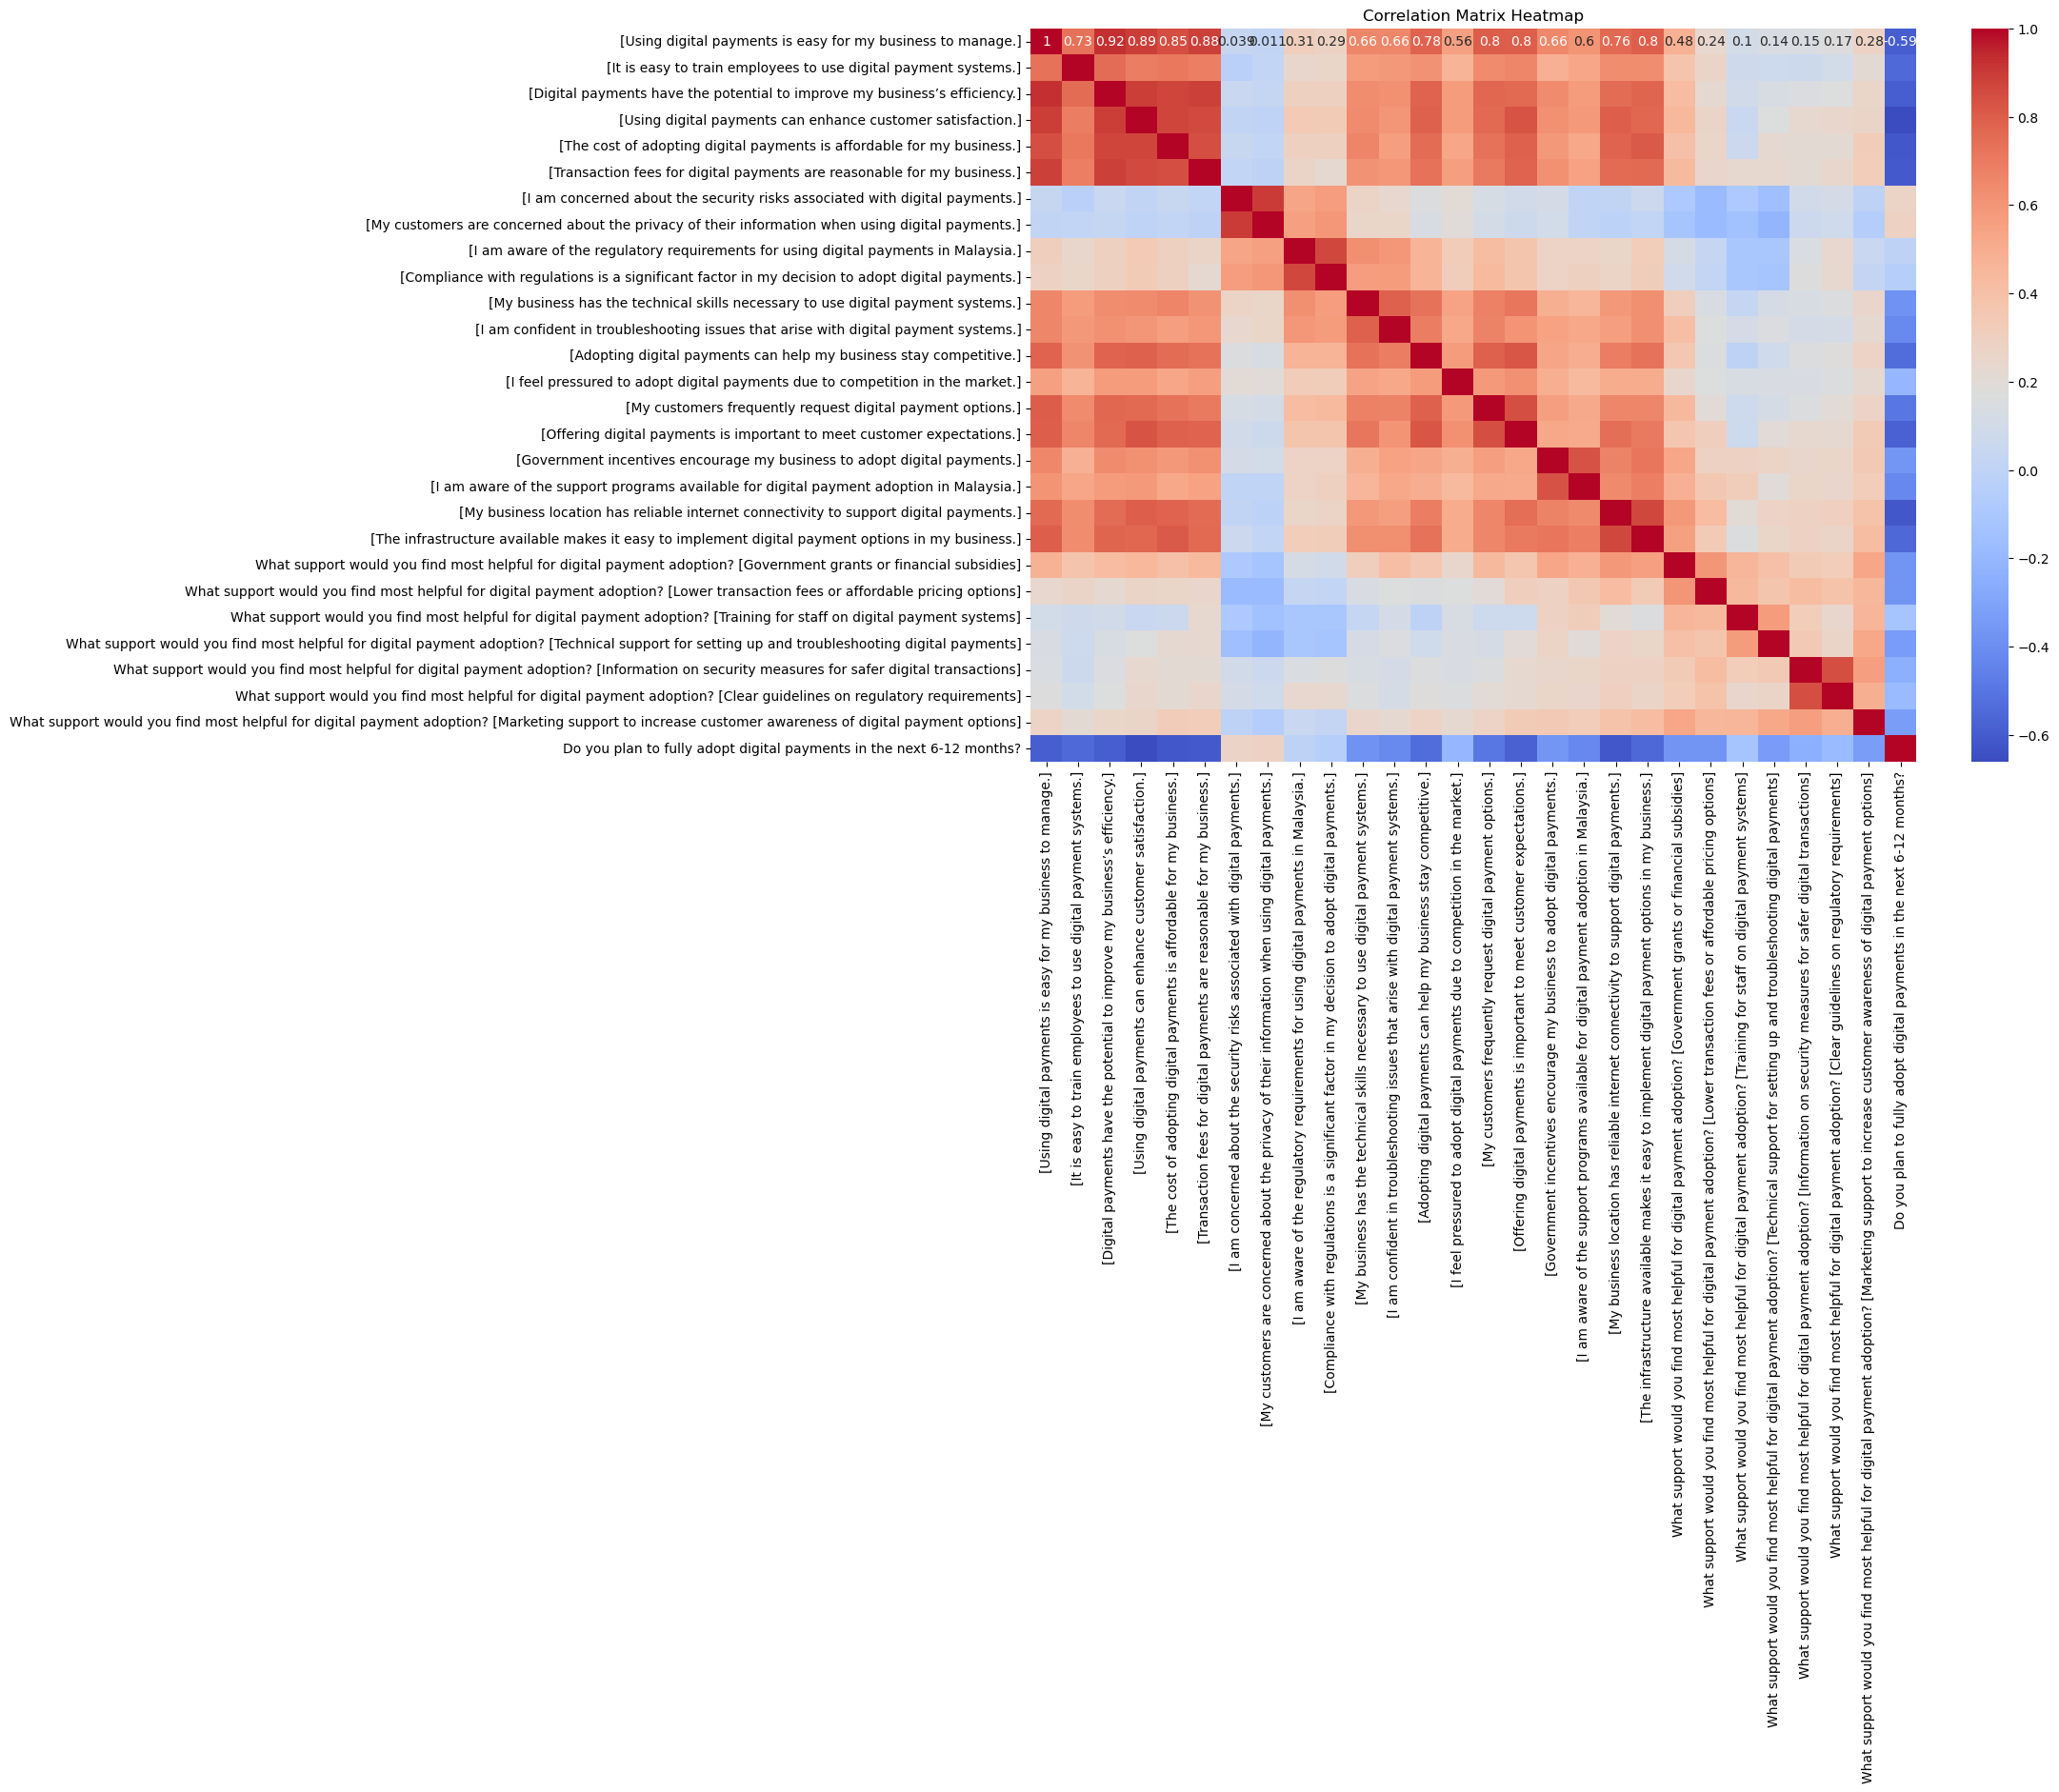

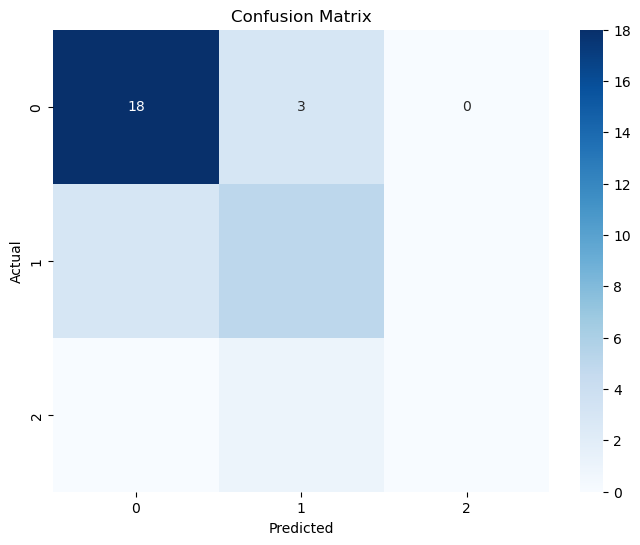

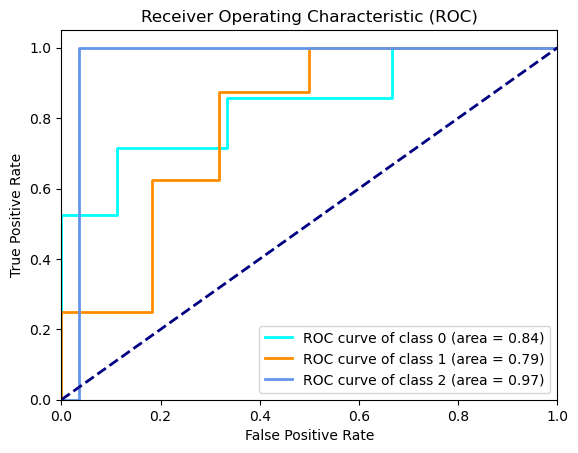

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc_score}")

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred, zero_division=1)
print('Classification Report:\n', class_report)

numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize

n_classes = len(model.classes_)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc_dict = dict()  
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dict[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



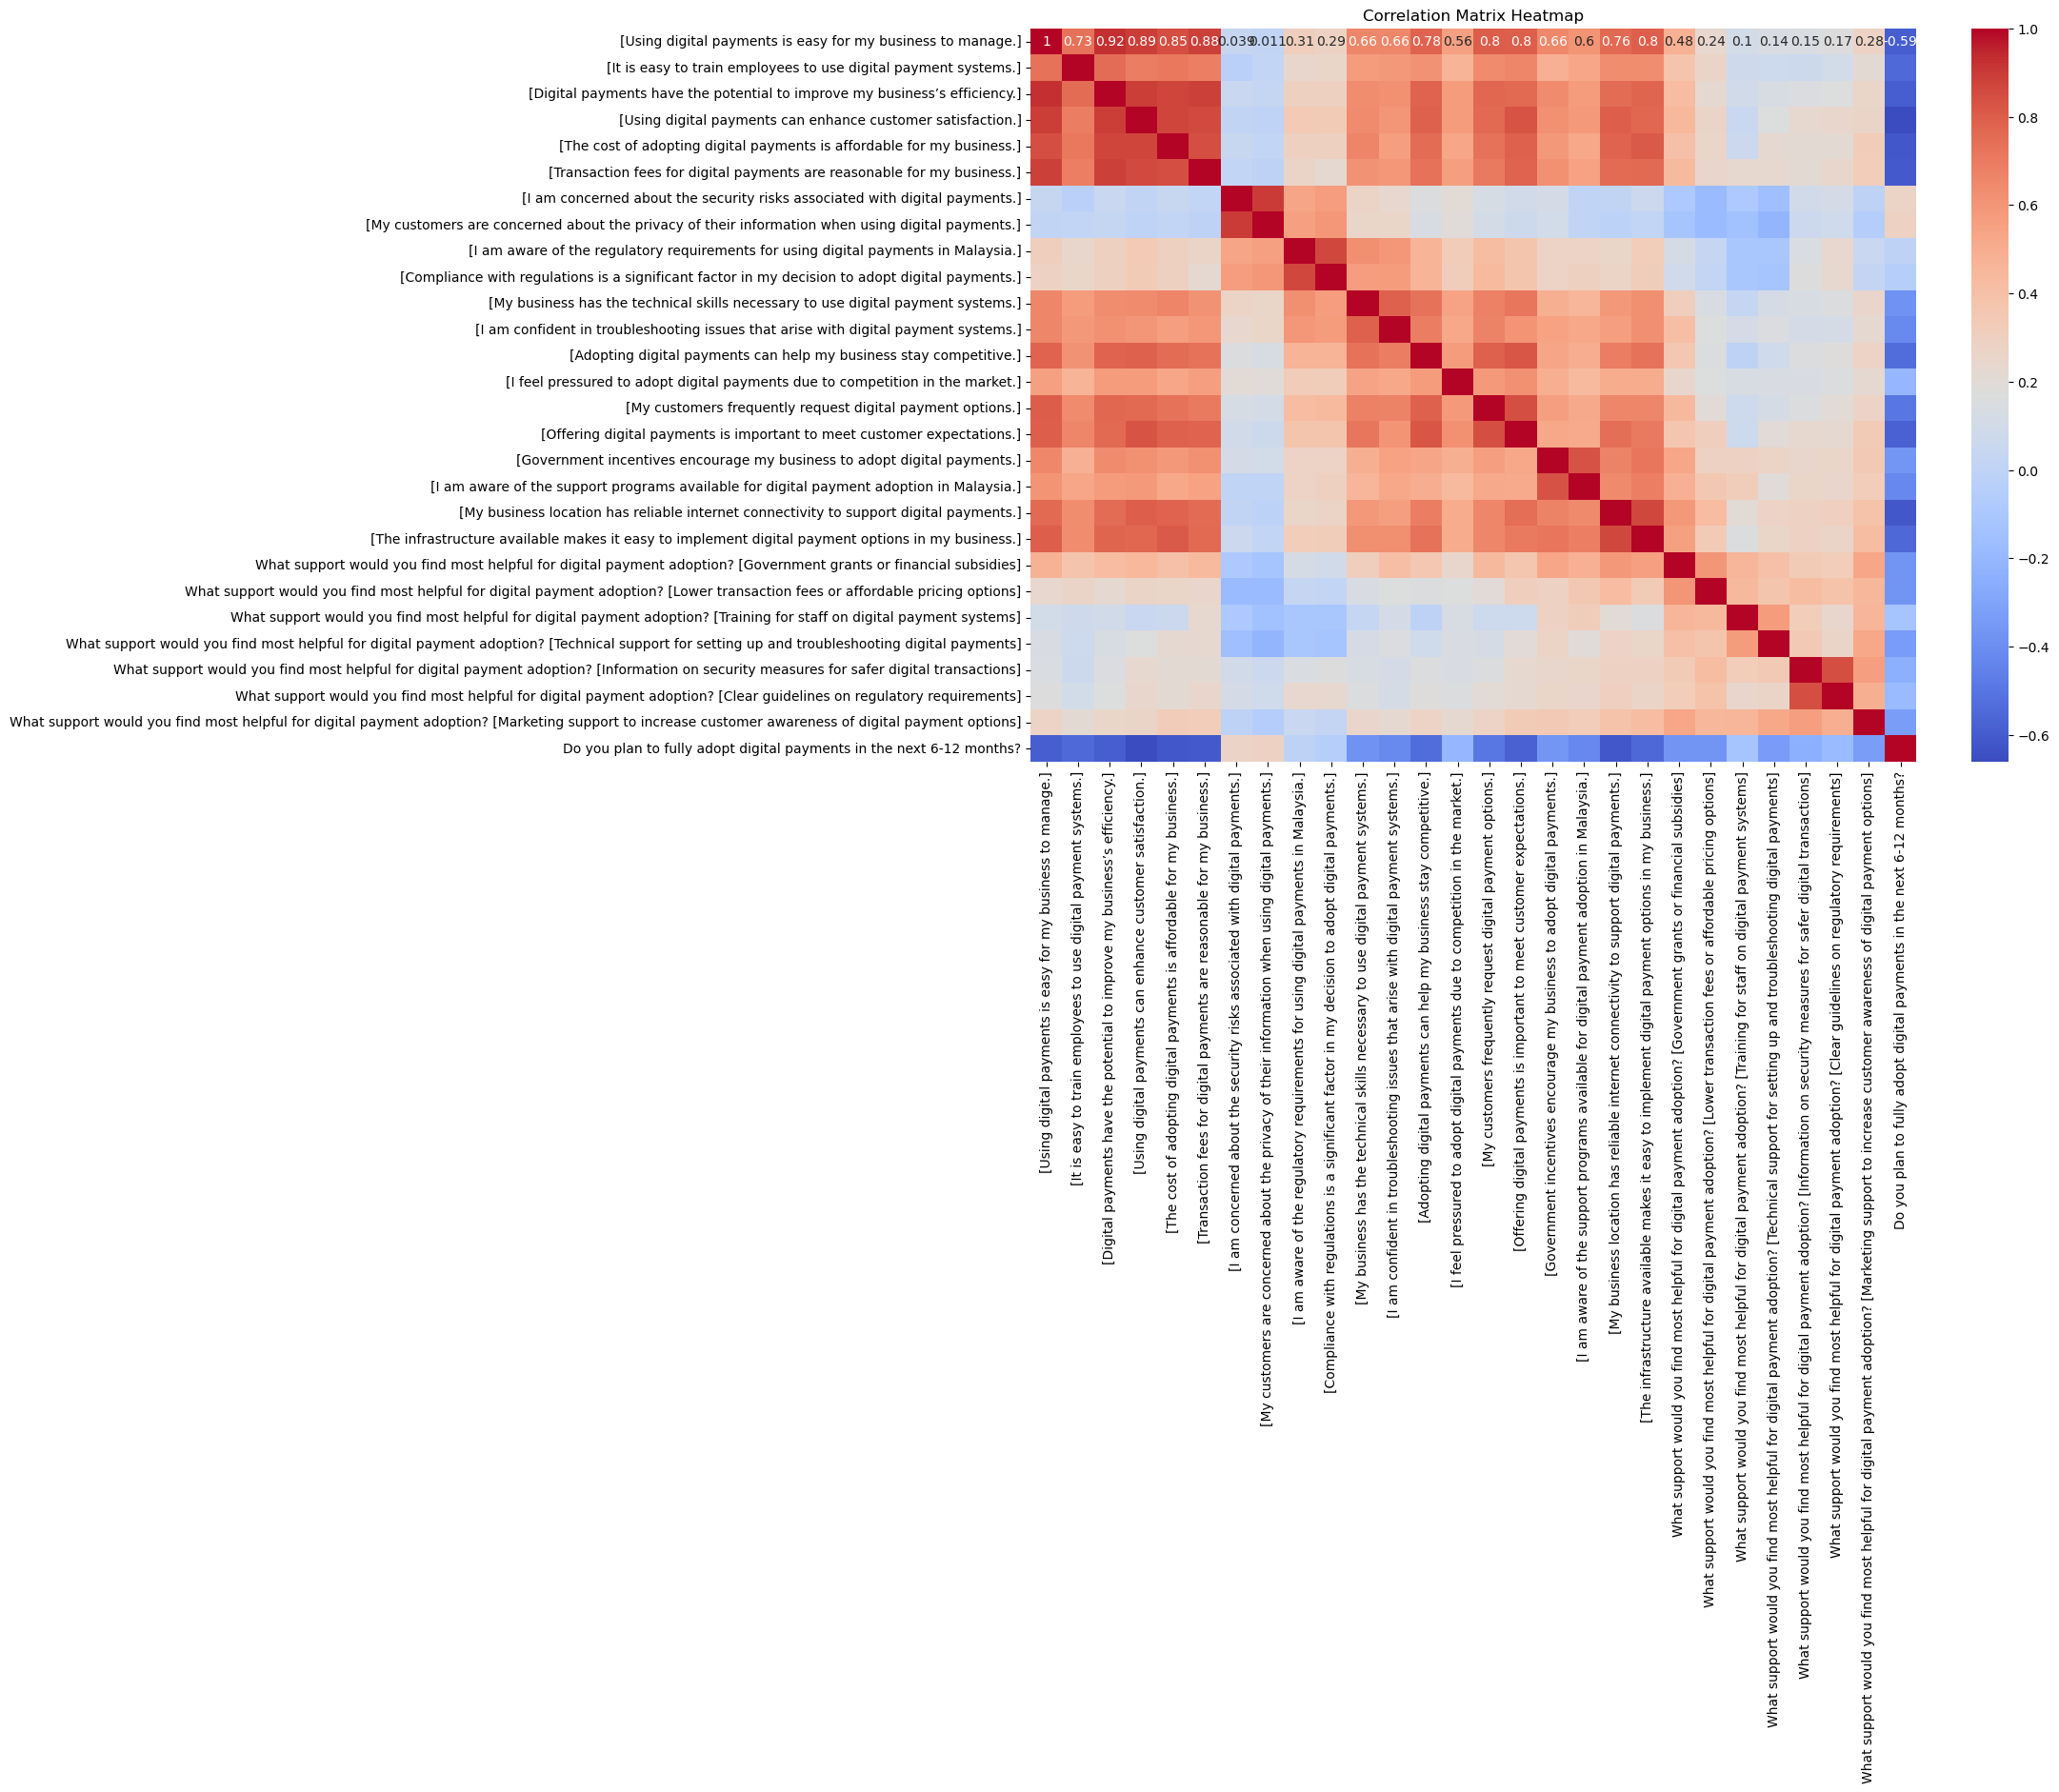

In [11]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
file_path = r'C:\Users\katri\Downloads\Survey Questionnaire for SME Owners (Responses) - Form Responses 1.csv'
data = pd.read_csv(file_path)

# Clean column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Create a DataFrame to store the correlations
correlation_df = correlation_matrix.stack().reset_index()
correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']

# Filter the DataFrame to include only significant correlations (e.g., |correlation| > 0.5)
significant_correlations = correlation_df[np.abs(correlation_df['Correlation Coefficient']) > 0.5]

# Remove self-correlations (i.e., where Variable 1 and Variable 2 are the same)
significant_correlations = significant_correlations[significant_correlations['Variable 1'] != significant_correlations['Variable 2']]

# Drop duplicate pairs (i.e., (A, B) and (B, A) should only appear once)
significant_correlations = significant_correlations.drop_duplicates(subset=['Correlation Coefficient'])

# Sort by absolute value of the correlation coefficient
significant_correlations = significant_correlations.sort_values(by='Correlation Coefficient', ascending=False)

# Save the summary table to a CSV file
output_folder = 'C:\\Users\\katri\\Downloads\\'
file_name = f'{output_folder}correlation_summary.csv'
significant_correlations.to_csv(file_name, index=False)

# Display the summary table
print(significant_correlations)


                                            Variable 1  \
2    [Using digital payments is easy for my busines...   
169  [I am concerned about the security risks assoc...   
57   [Digital payments have the potential to improv...   
3    [Using digital payments is easy for my busines...   
59   [Digital payments have the potential to improv...   
..                                                 ...   
421  [Offering digital payments is important to mee...   
395  [My customers frequently request digital payme...   
422  [Offering digital payments is important to mee...   
370  [I feel pressured to adopt digital payments du...   
369  [I feel pressured to adopt digital payments du...   

                                            Variable 2  \
2    [Digital payments have the potential to improv...   
169  [My customers are concerned about the privacy ...   
57   [Using digital payments can enhance customer s...   
3    [Using digital payments can enhance customer s...   
59   [Transac

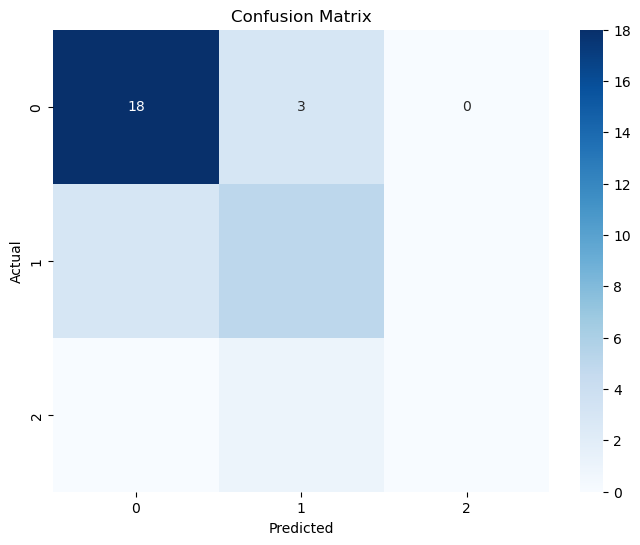

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

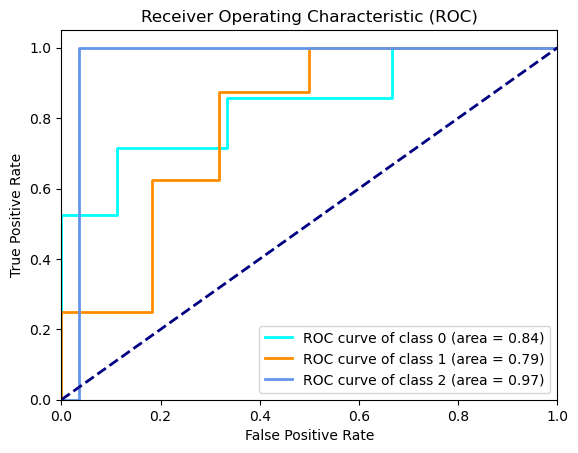

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize

n_classes = len(model.classes_)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc_dict = dict()  
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dict[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

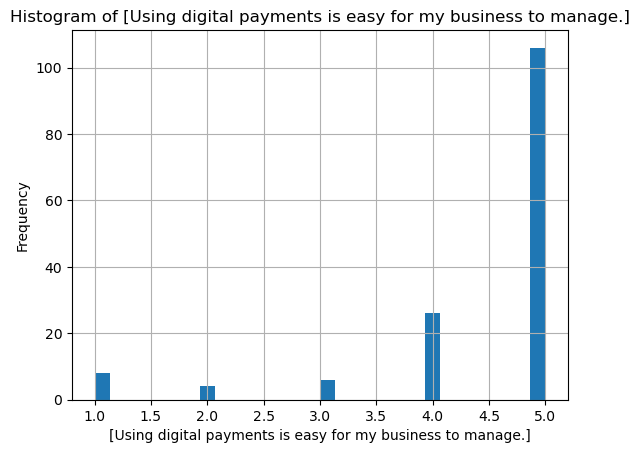

In [9]:
plt.figure()
data['[Using digital payments is easy for my business to manage.]'].hist(bins=30)
plt.title('Histogram of [Using digital payments is easy for my business to manage.]')
plt.xlabel('[Using digital payments is easy for my business to manage.]')
plt.ylabel('Frequency')
plt.show()

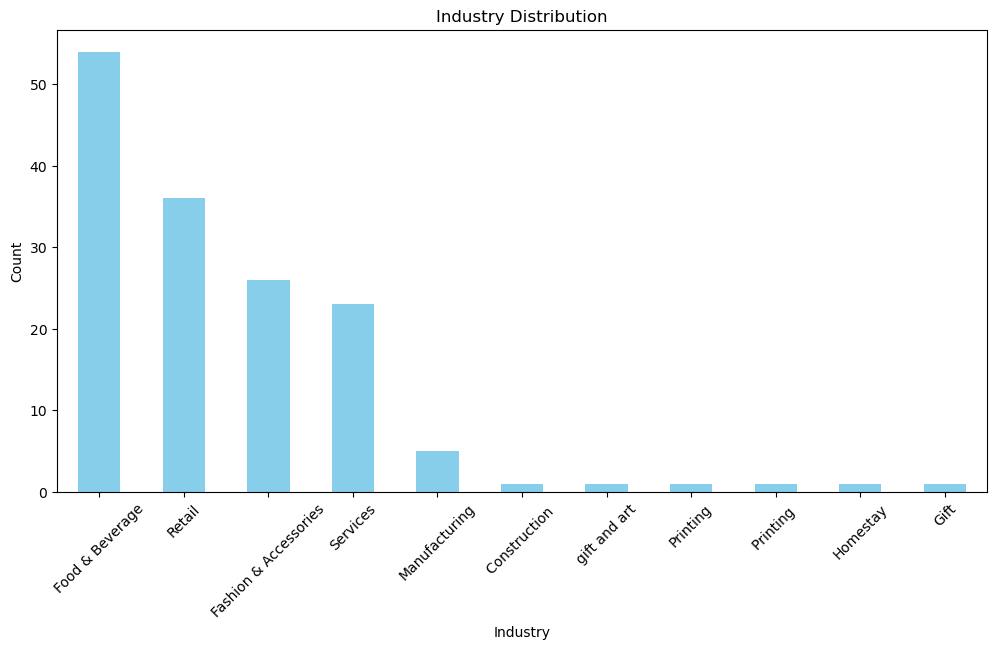

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data['In which industry does your business operate?'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


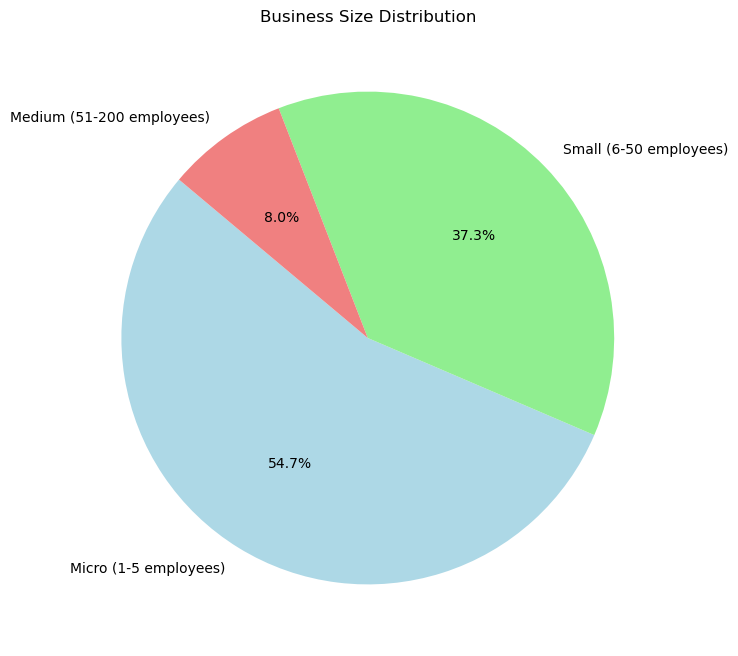

In [11]:
plt.figure(figsize=(8, 8))
data['What is the size of your business?'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('Business Size Distribution')
plt.ylabel('')
plt.show()


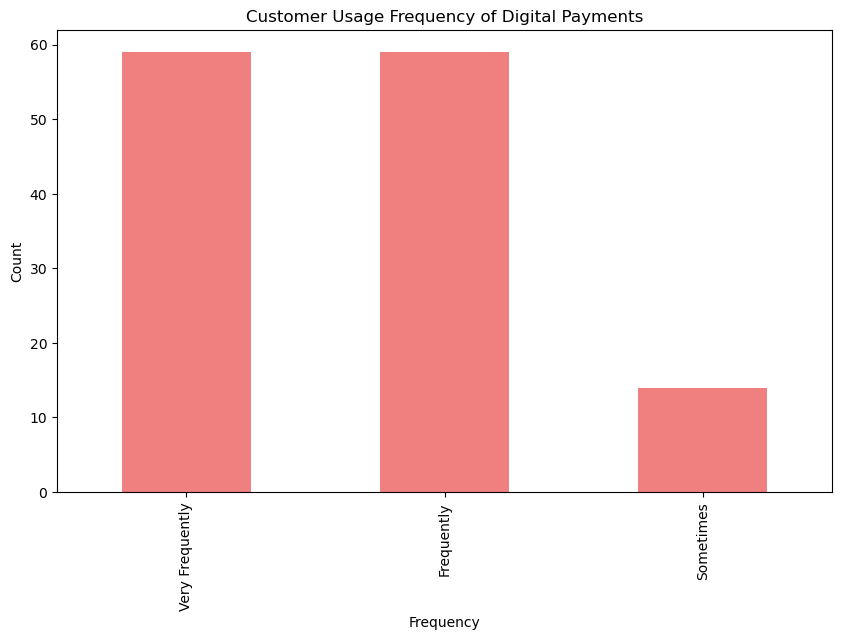

In [12]:
plt.figure(figsize=(10, 6))
data['How often do customers use digital payments in your business?'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Customer Usage Frequency of Digital Payments')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()


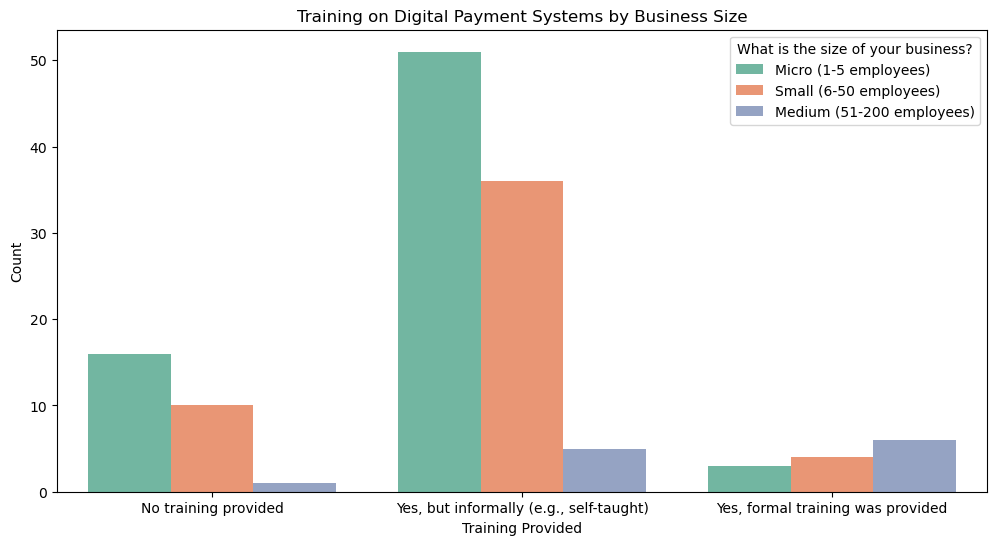

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Has your team received any formal training on digital payment systems?', hue='What is the size of your business?', data=data, palette='Set2')
plt.title('Training on Digital Payment Systems by Business Size')
plt.xlabel('Training Provided')
plt.ylabel('Count')
plt.show()


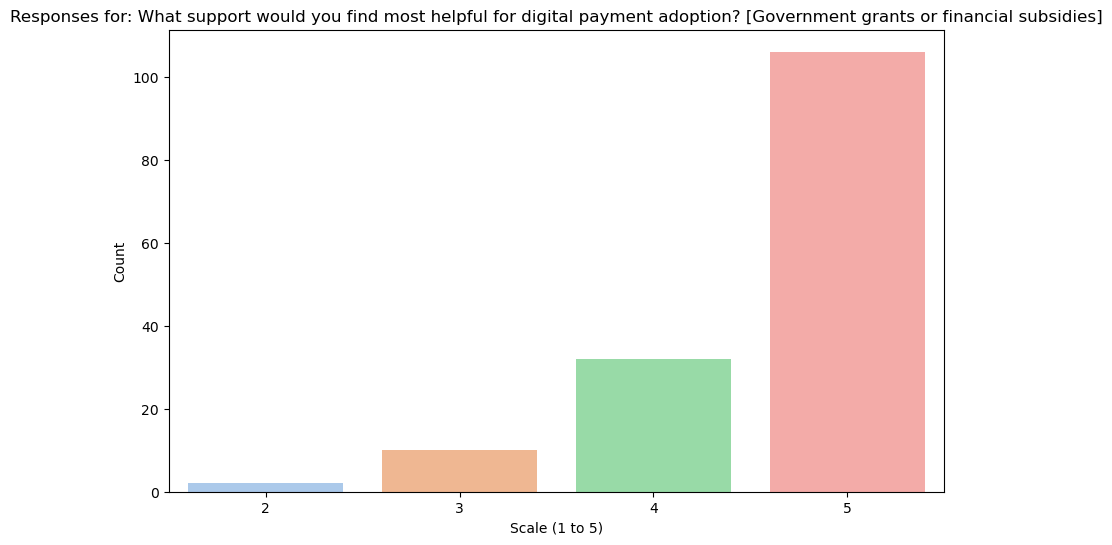

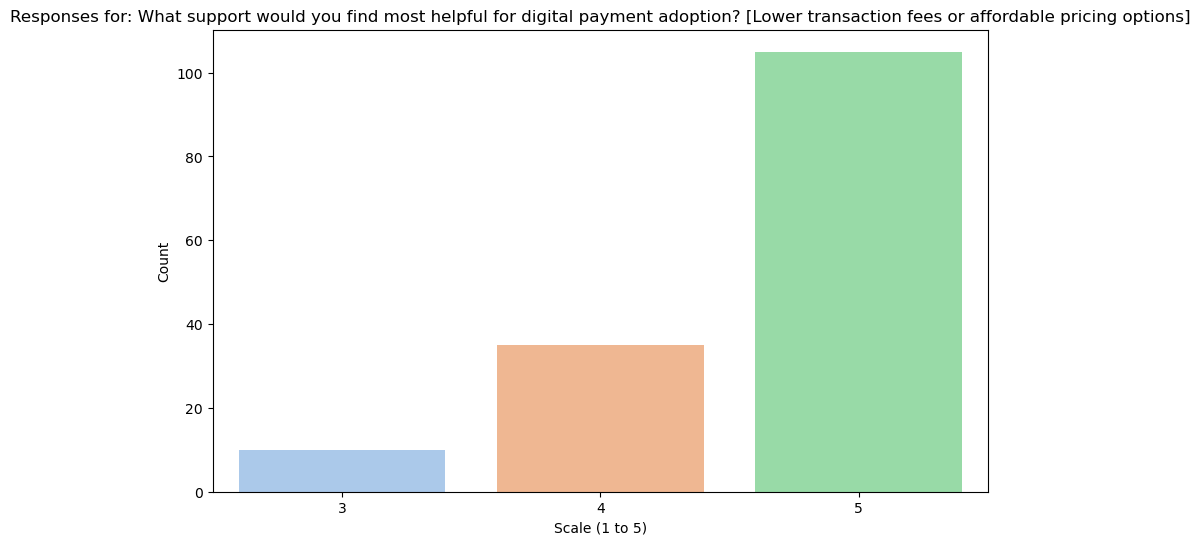

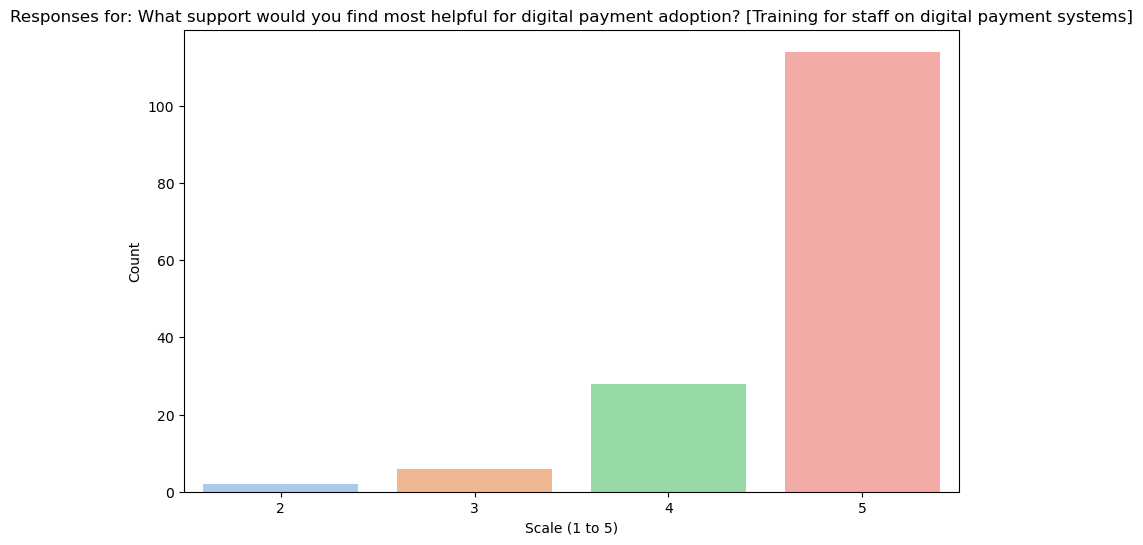

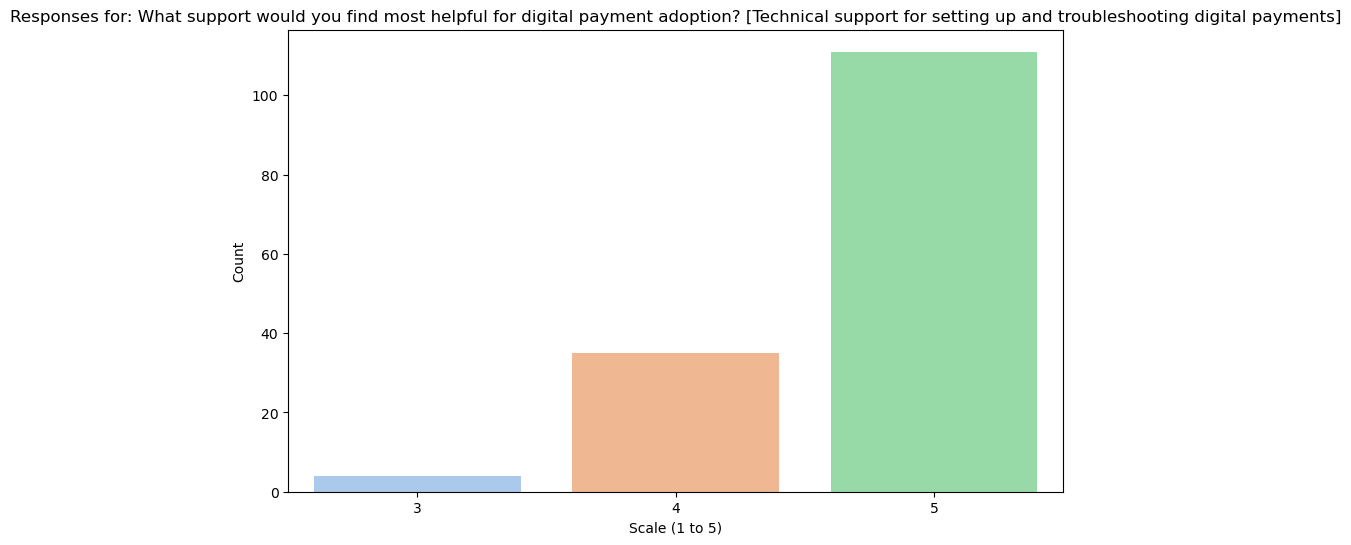

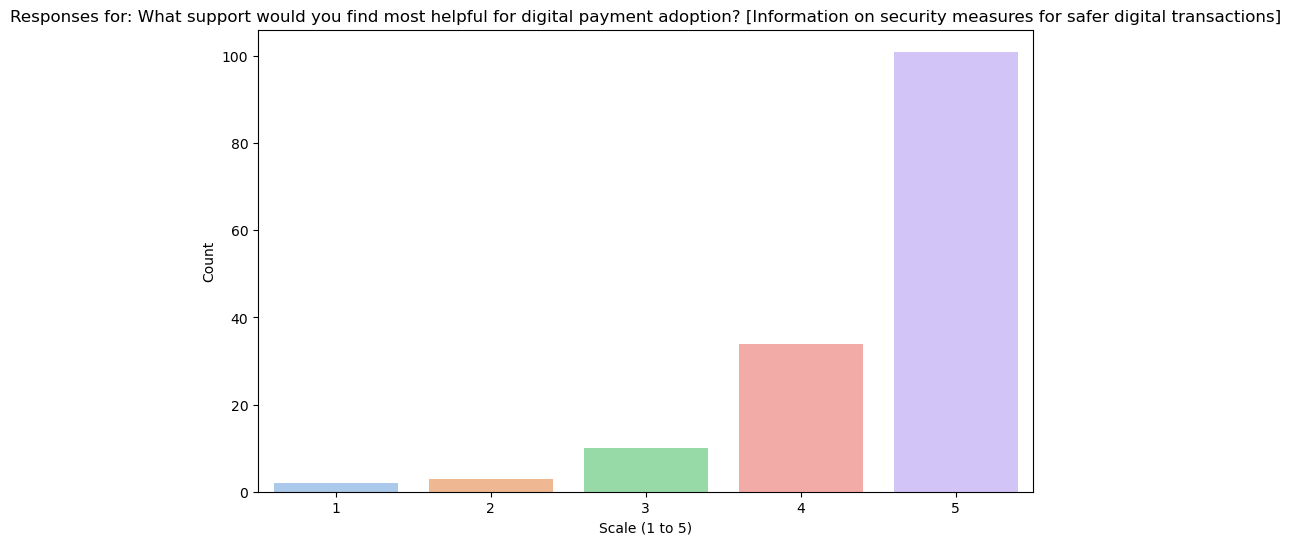

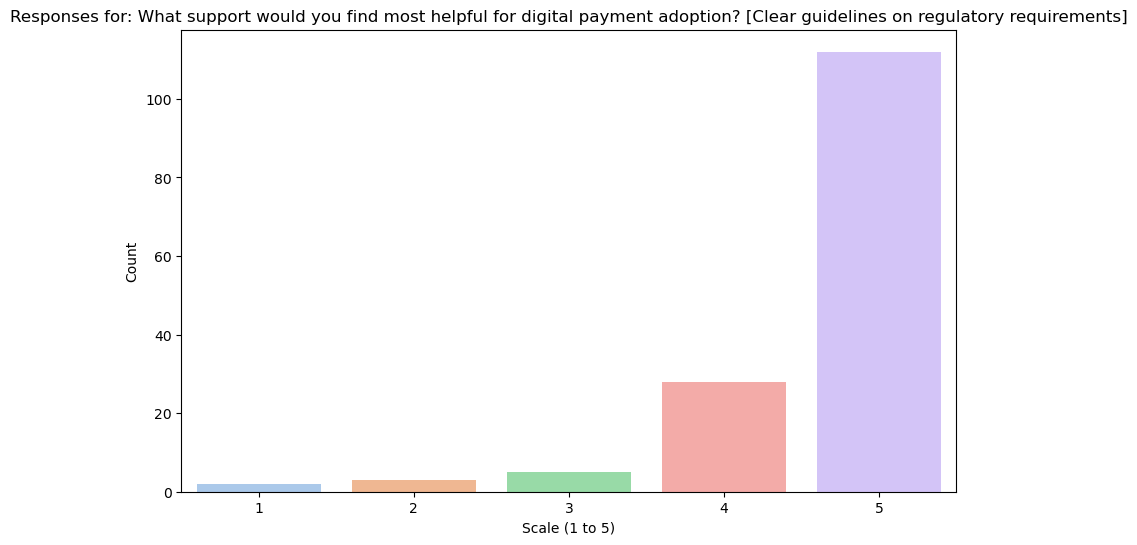

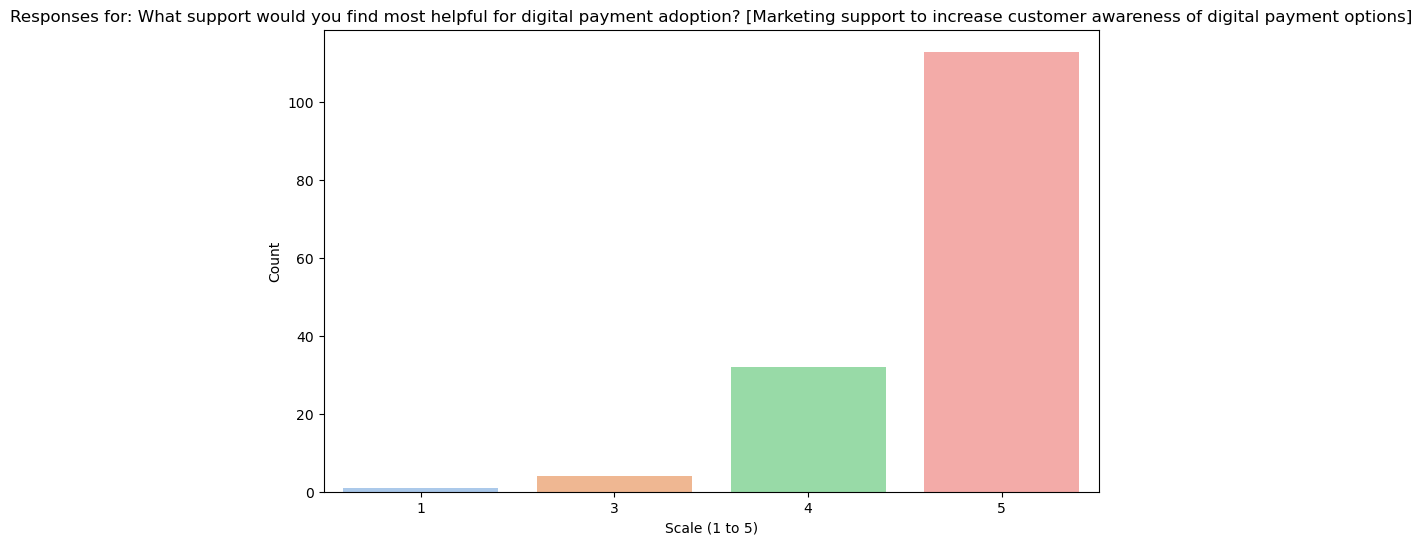

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

support_options = [
    'What support would you find most helpful for digital payment adoption? [Government grants or financial subsidies]',
    'What support would you find most helpful for digital payment adoption? [Lower transaction fees or affordable pricing options]',
    'What support would you find most helpful for digital payment adoption? [Training for staff on digital payment systems]',
    'What support would you find most helpful for digital payment adoption? [Technical support for setting up and troubleshooting digital payments]',
    'What support would you find most helpful for digital payment adoption? [Information on security measures for safer digital transactions]',
    'What support would you find most helpful for digital payment adoption? [Clear guidelines on regulatory requirements]',
    'What support would you find most helpful for digital payment adoption? [Marketing support to increase customer awareness of digital payment options]'
]

for option in support_options:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[option], palette='pastel')
    plt.title(f'Responses for: {option}')
    plt.xlabel('Scale (1 to 5)')
    plt.ylabel('Count')
    plt.show()


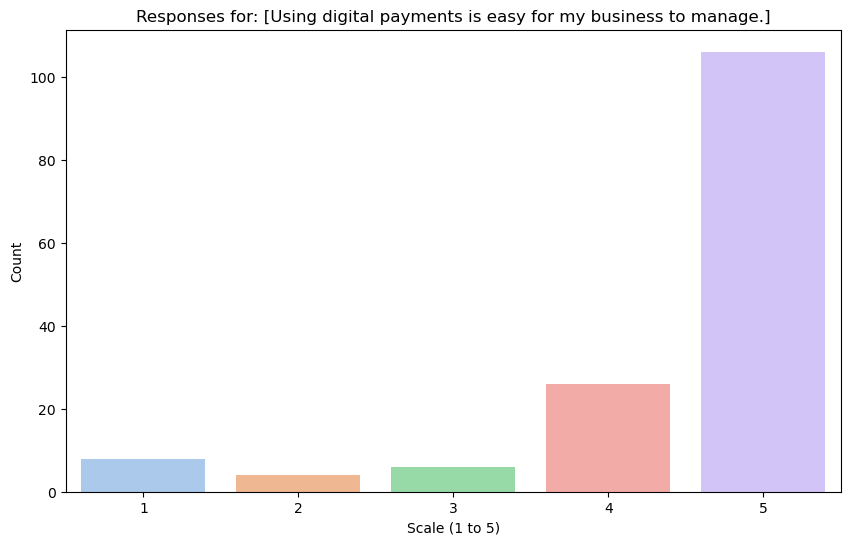

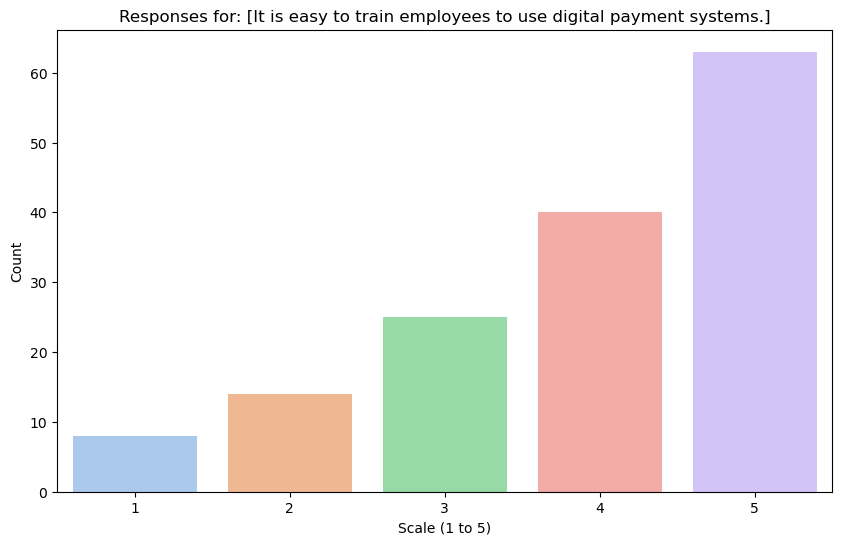

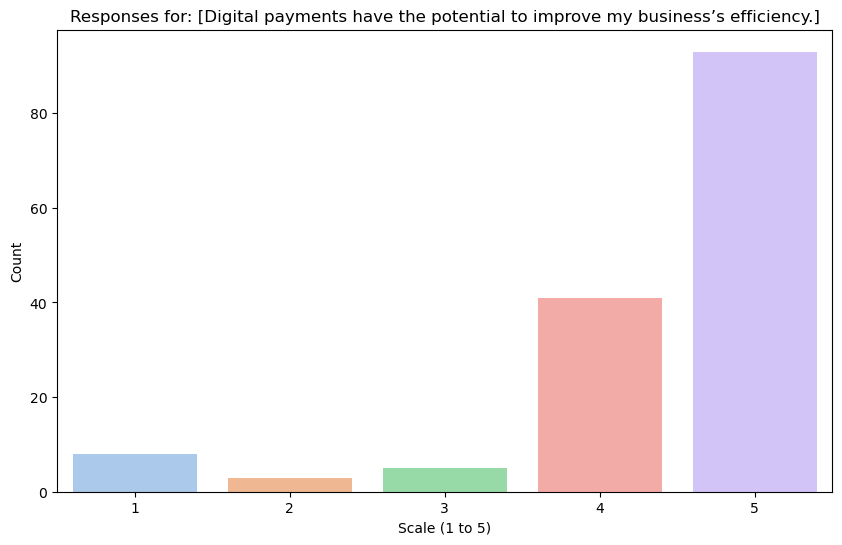

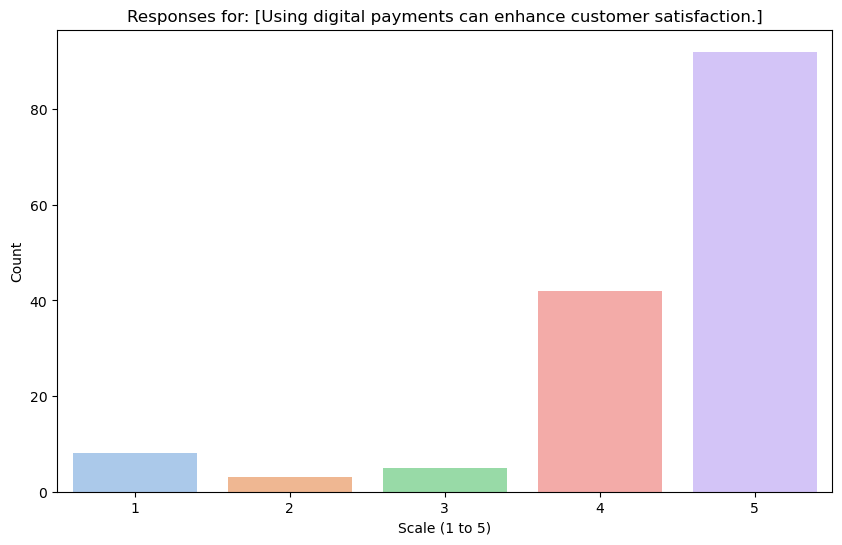

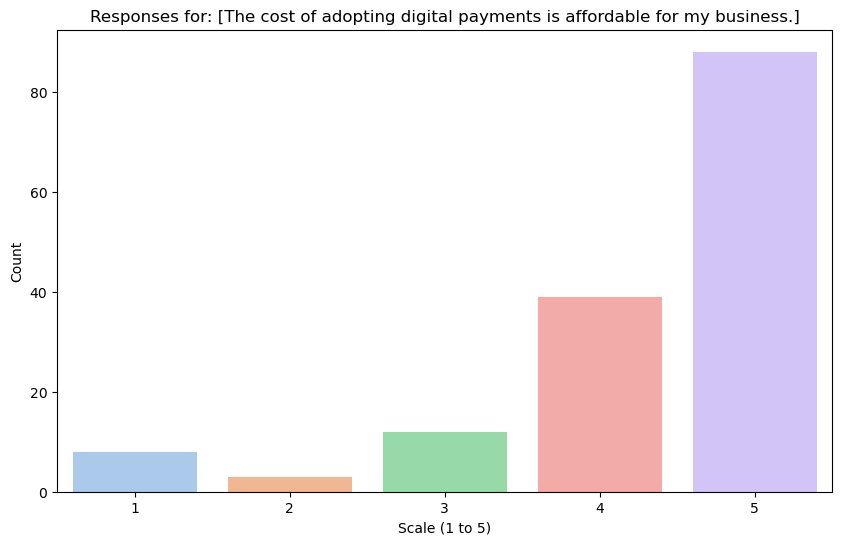

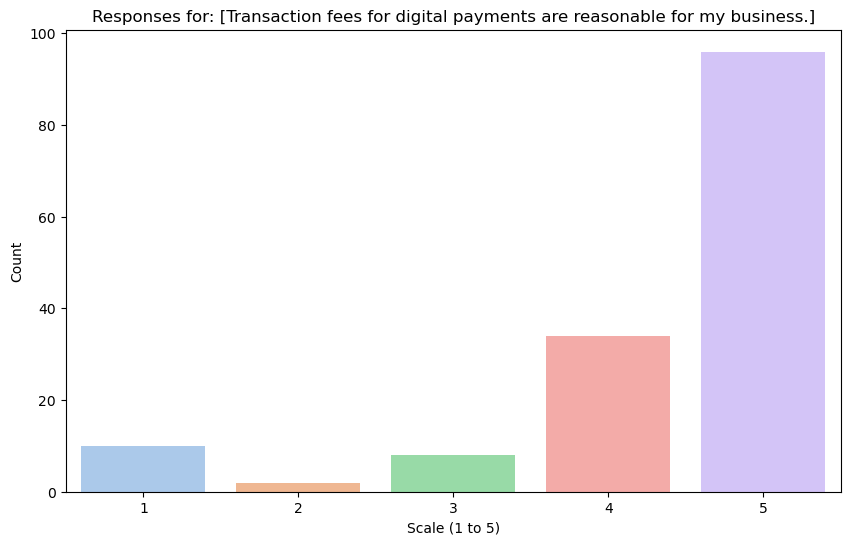

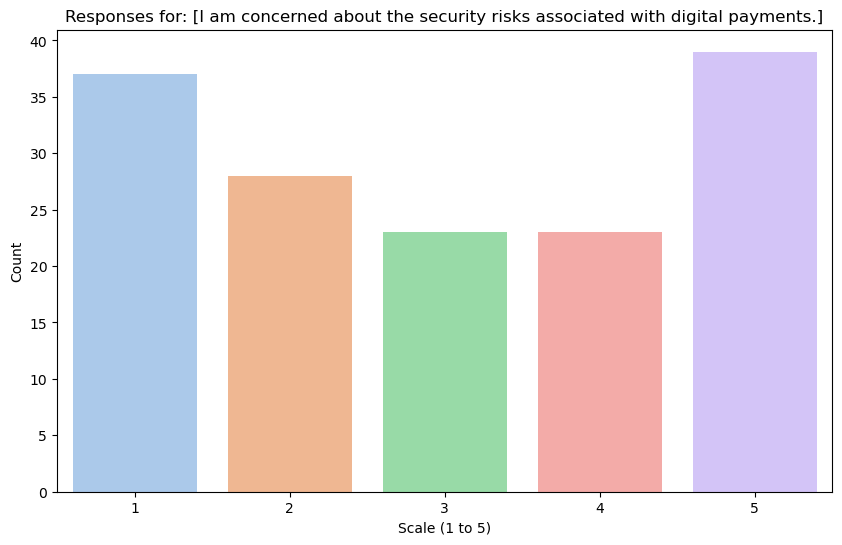

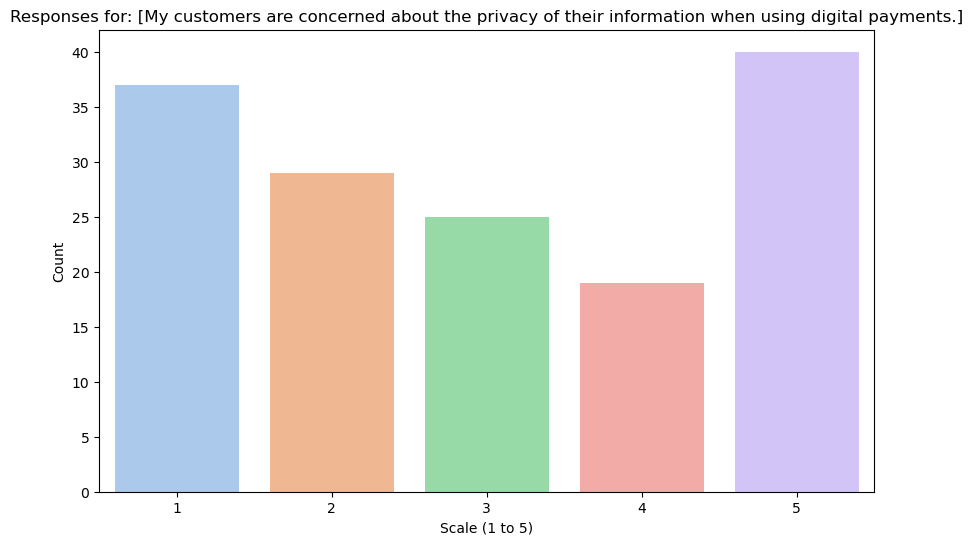

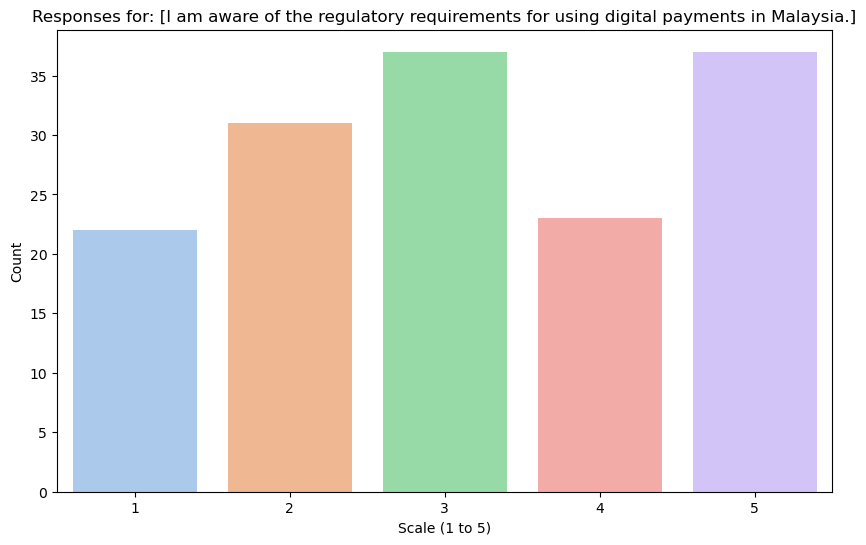

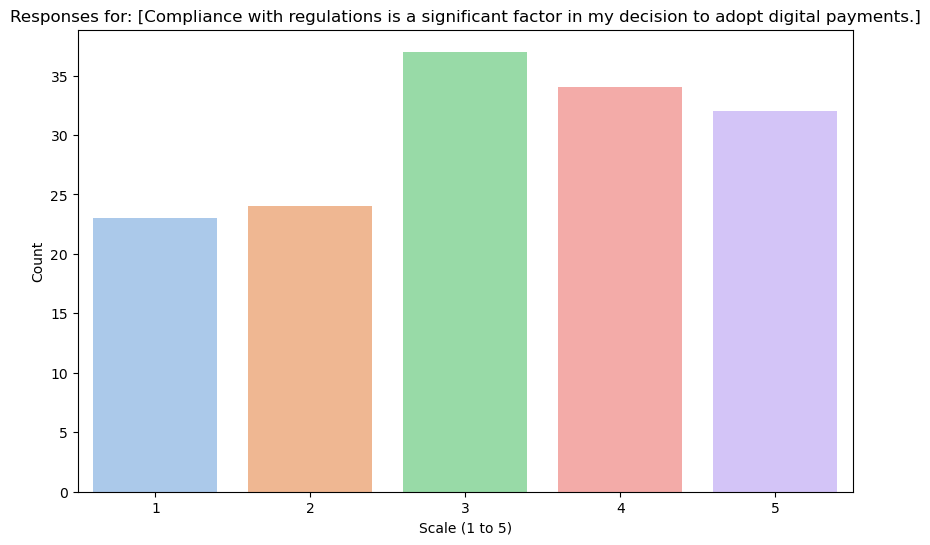

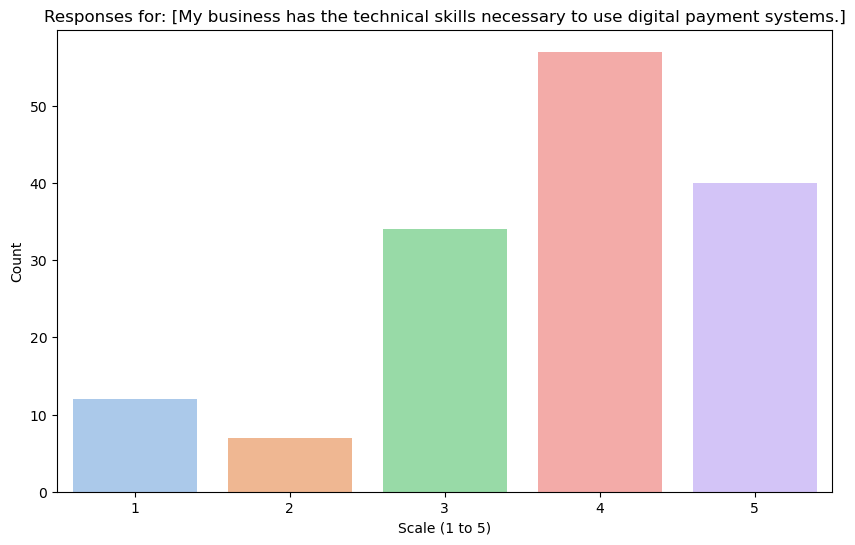

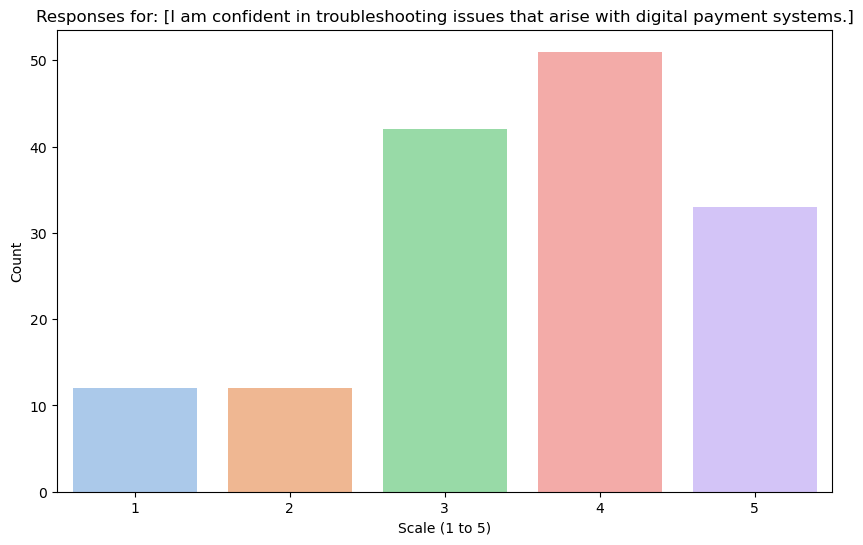

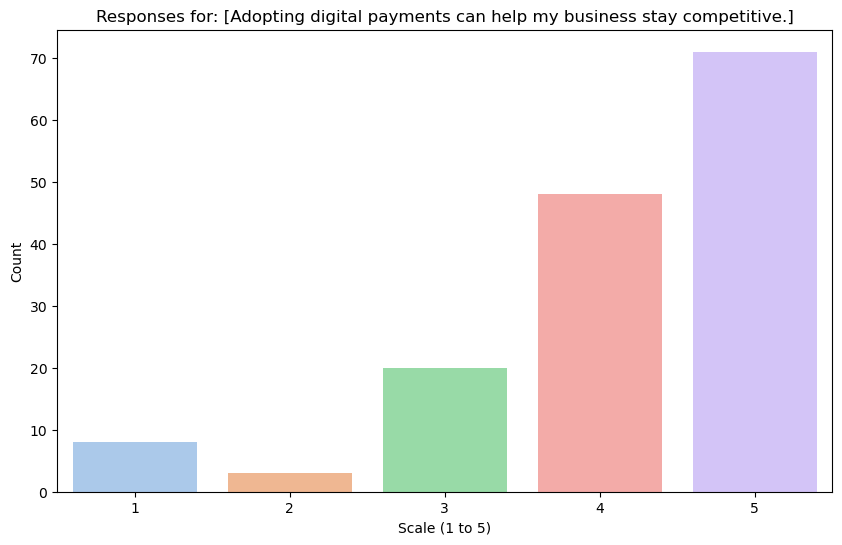

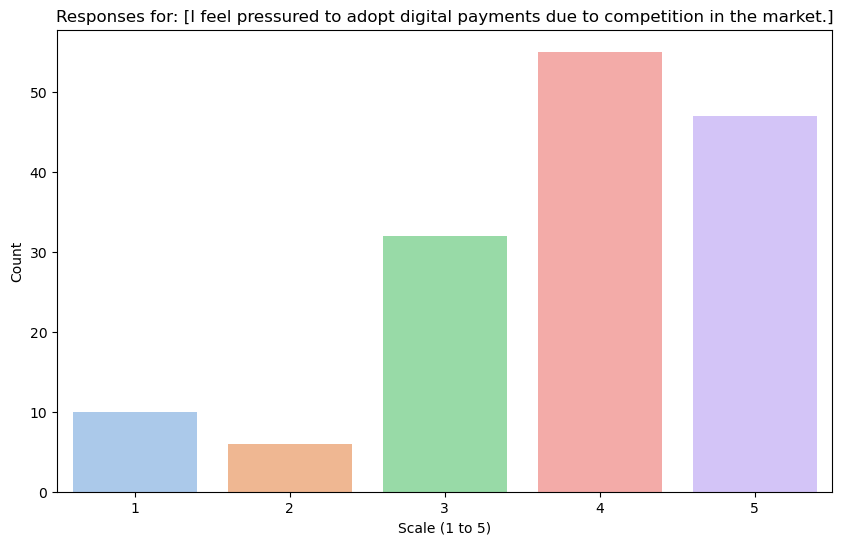

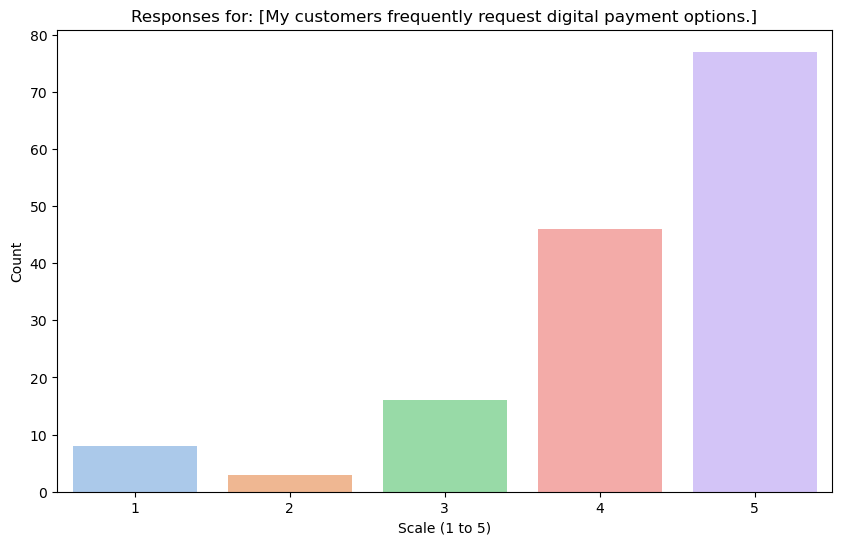

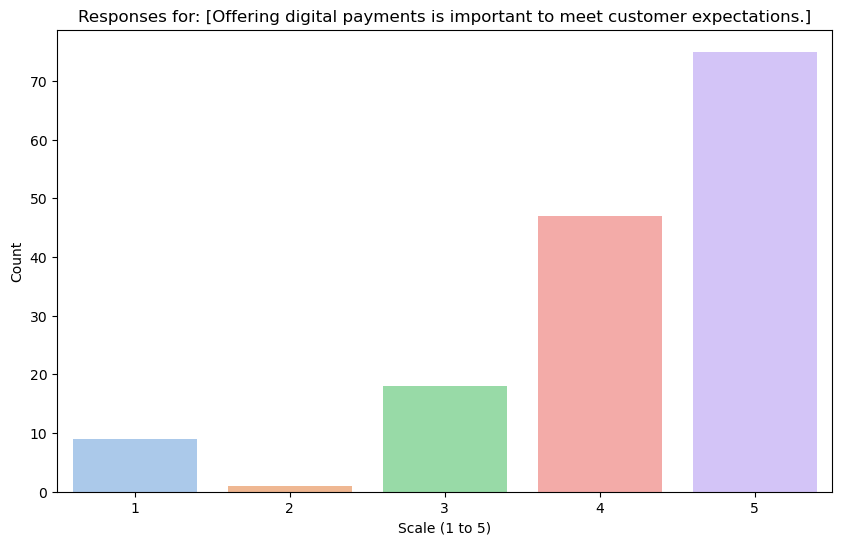

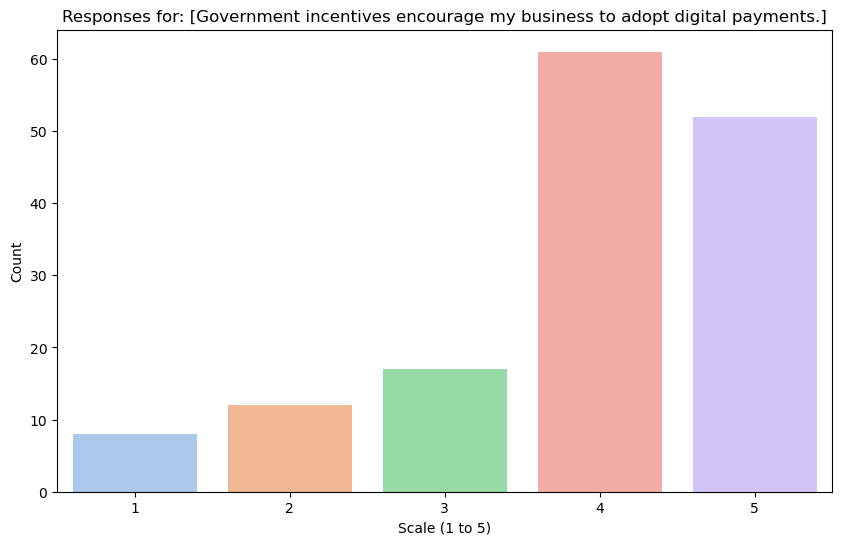

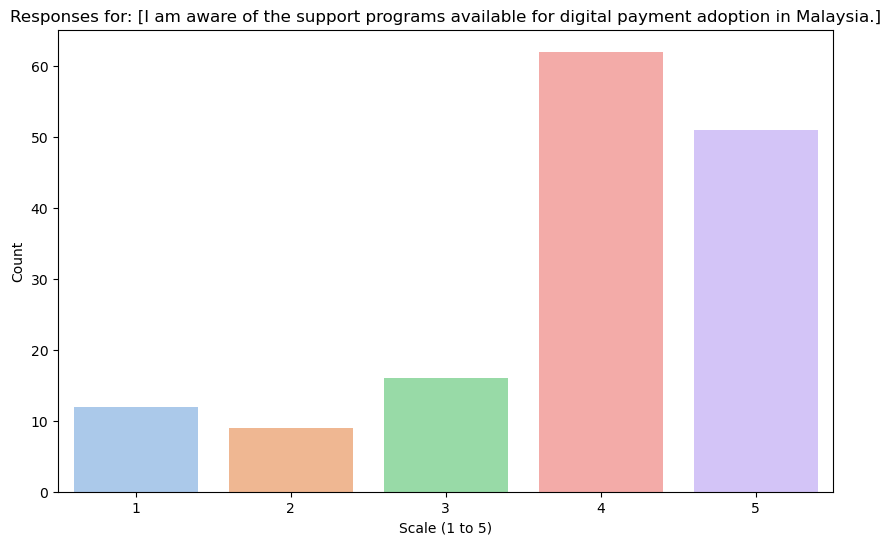

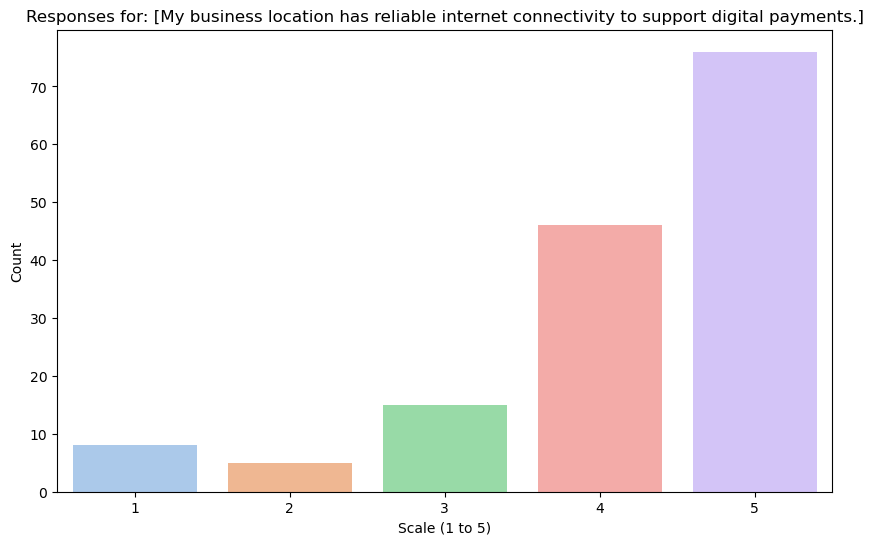

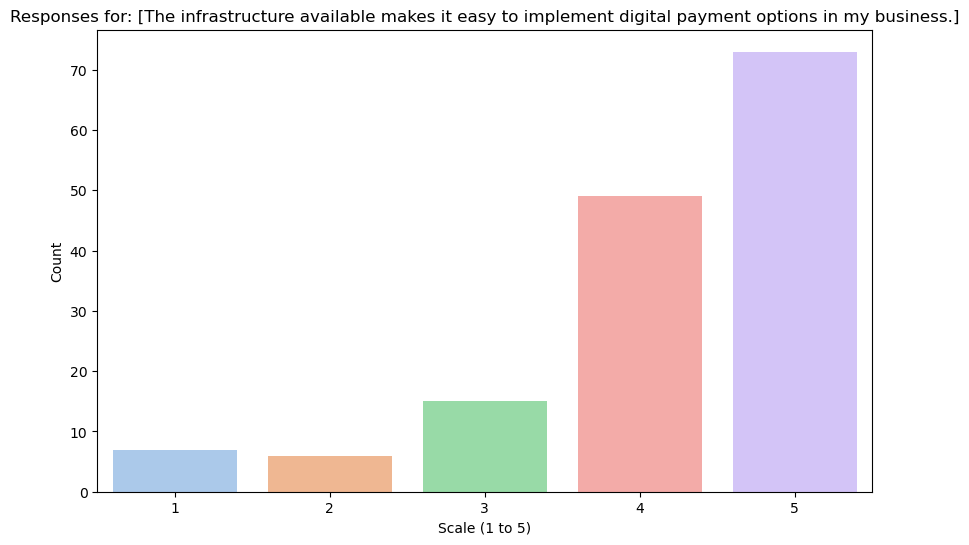

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

scale_questions = [
    '[Using digital payments is easy for my business to manage.]',
    '[It is easy to train employees to use digital payment systems.]',
    '[Digital payments have the potential to improve my business’s efficiency.]',
    '[Using digital payments can enhance customer satisfaction.]',
    '[The cost of adopting digital payments is affordable for my business.]',
    '[Transaction fees for digital payments are reasonable for my business.]',
    '[I am concerned about the security risks associated with digital payments.]',
    '[My customers are concerned about the privacy of their information when using digital payments.]',
    '[I am aware of the regulatory requirements for using digital payments in Malaysia.]',
    '[Compliance with regulations is a significant factor in my decision to adopt digital payments.]',
    '[My business has the technical skills necessary to use digital payment systems.]',
    '[I am confident in troubleshooting issues that arise with digital payment systems.]',
    '[Adopting digital payments can help my business stay competitive.]',
    '[I feel pressured to adopt digital payments due to competition in the market.]',
    '[My customers frequently request digital payment options.]',
    '[Offering digital payments is important to meet customer expectations.]',
    '[Government incentives encourage my business to adopt digital payments.]',
    '[I am aware of the support programs available for digital payment adoption in Malaysia.]',
    '[My business location has reliable internet connectivity to support digital payments.]',
    '[The infrastructure available makes it easy to implement digital payment options in my business.]'
]

for question in scale_questions:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[question], palette='pastel')
    plt.title(f'Responses for: {question}')
    plt.xlabel('Scale (1 to 5)')
    plt.ylabel('Count')
    plt.show()


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the CSV file
file_path = r'C:\Users\katri\Downloads\Survey Questionnaire for SME Owners (Responses) - Form Responses 1.csv'
data = pd.read_csv(file_path)

# Clean column names by stripping any leading/trailing spaces
data.columns = data.columns.str.strip()

# Define the target variable and convert to numerical categories
target_variable = 'Do you plan to fully adopt digital payments in the next 6-12 months?'
data[target_variable] = data[target_variable].map({
    'Yes, definitely': 1,
    'Yes, possibly': 1,
    'No, unlikely': 0,
    'No, definitely not': 0
})

# Drop rows with missing target variable values
data = data.dropna(subset=[target_variable])

# List of actual feature names
features = [
    '[Using digital payments is easy for my business to manage.]',
    '[It is easy to train employees to use digital payment systems.]',
    '[Digital payments have the potential to improve my business’s efficiency.]',
    '[Using digital payments can enhance customer satisfaction.]',
    '[The cost of adopting digital payments is affordable for my business.]',
    '[Transaction fees for digital payments are reasonable for my business.]',
    '[I am concerned about the security risks associated with digital payments.]',
    '[My customers are concerned about the privacy of their information when using digital payments.]',
    '[I am aware of the regulatory requirements for using digital payments in Malaysia.]',
    '[Compliance with regulations is a significant factor in my decision to adopt digital payments.]',
    '[My business has the technical skills necessary to use digital payment systems.]',
    '[I am confident in troubleshooting issues that arise with digital payment systems.]',
    '[Adopting digital payments can help my business stay competitive.]',
    '[I feel pressured to adopt digital payments due to competition in the market.]',
    '[My customers frequently request digital payment options.]',
    '[Offering digital payments is important to meet customer expectations.]',
    '[Government incentives encourage my business to adopt digital payments.]',
    '[I am aware of the support programs available for digital payment adoption in Malaysia.]',
    '[My business location has reliable internet connectivity to support digital payments.]',
    '[The infrastructure available makes it easy to implement digital payment options in my business.]'
]

# Handle missing values by filling them with the mean of the column
for feature in features:
    data[feature].fillna(data[feature].mean(), inplace=True)

# Convert categorical variables to numerical
X = pd.get_dummies(data[features], drop_first=True)
y = data[target_variable]

# Add a constant for the intercept term
X = sm.add_constant(X)

# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF DataFrame
print(vif_data)

# Remove features with VIF > 10 to address multicollinearity
features_to_keep = vif_data[vif_data["VIF"] <= 10]["feature"].tolist()

# Update X with features that have VIF <= 10
X = X[features_to_keep]

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X).fit()

# Extract the coefficients, p-values, and odds ratios
coefficients = model.params
p_values = model.pvalues
odds_ratios = np.exp(coefficients)

# Create a summary table
summary_table = pd.DataFrame({
    'Predictor': coefficients.index,
    'Coefficient': coefficients.values,
    'Odds Ratio': odds_ratios.values,
    'P-value': p_values.values
})

# Save the summary table to a CSV file
summary_table.to_csv('C:\\Users\\katri\\Downloads\\logistic_regression_summary.csv', index=False)

# Display the summary table
print(summary_table)


                                              feature        VIF
0                                               const  25.616265
1   [Using digital payments is easy for my busines...  10.996285
2   [It is easy to train employees to use digital ...   2.923030
3   [Digital payments have the potential to improv...  11.268917
4   [Using digital payments can enhance customer s...   8.983239
5   [The cost of adopting digital payments is affo...   7.393048
6   [Transaction fees for digital payments are rea...   6.819456
7   [I am concerned about the security risks assoc...   5.800420
8   [My customers are concerned about the privacy ...   6.012823
9   [I am aware of the regulatory requirements for...   5.033109
10  [Compliance with regulations is a significant ...   5.164749
11  [My business has the technical skills necessar...   4.479002
12  [I am confident in troubleshooting issues that...   4.087456
13  [Adopting digital payments can help my busines...   4.919243
14  [I feel pressured to 